# Unseen Data Model Test

- Utilized MPI

## Data Preprocessing

In [89]:
INPUT_SHAPE=X[0].shape
OUTPUT_SHAPE=pco2_images[0].shape

INPUT_SHAPE

(180, 360, 5)

In [ ]:
import tensorflow.keras.backend as kb
import tensorflow as tf
from tensorflow.keras import backend as K

def custom_rmse(y_true, y_pred):
    """
    custom_rmse(y_true, y_pred)
    calculates root square mean value with focusing only on the ocean
    """
    #y_pred = y_pred[y_true != 0]
    #y_true = y_true[y_true != 0]
    
    y_pred = tf.convert_to_tensor(y_pred)
    y_true = tf.cast(y_true, y_pred.dtype)
    
    return K.sqrt(K.mean(tf.math.squared_difference(y_pred, y_true), axis=-1))

## Other CESM Dataset Resule

In [112]:
dir_name="../data/member_035"
X, pco2_images = preprocess_images(dir_name,mem_num="035")

In [113]:
best_model = tf.keras.models.load_model('../models/base_model/reduceddim_model1.h5', custom_objects={'custom_rmse':custom_rmse})
predicted_image=best_model.predict(X,verbose=1)

14/14 [==============================] - 1s 70ms/step


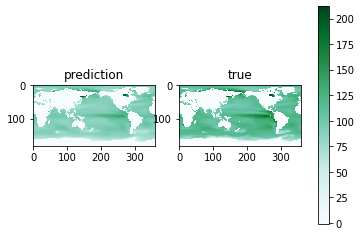

In [121]:
figure, axis = plt.subplots(1, 2)

img=axis[0].imshow(np.flipud(np.squeeze(predicted_image[300])), cmap="BuGn", interpolation="nearest")
axis[0].set_title("prediction")
plt.colorbar(img,ax=axis)

img1=axis[1].imshow(np.flipud(np.squeeze(pco2_images[300])), cmap="BuGn", interpolation="nearest")
axis[1].set_title("true")
plt.savefig('../assets/val_comparison.png', dpi=199)
plt.show()



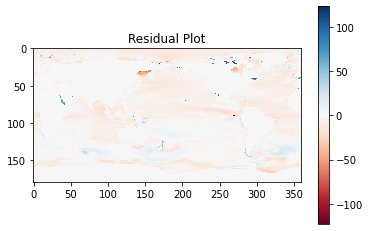

In [119]:
diff=np.flipud(np.squeeze(pco2_images[300]-predicted_image[300]))
plt.imshow(diff,cmap="RdBu", interpolation="nearest")
plt.colorbar()
plt.title("Residual Plot")

plt.savefig('../assets/val_residual.png', dpi=199)
plt.show()

In [120]:
print("RMSE score!")
np.sqrt(np.mean((predicted_image-pco2_images)**2))



RMSE score!


7.682020046545184

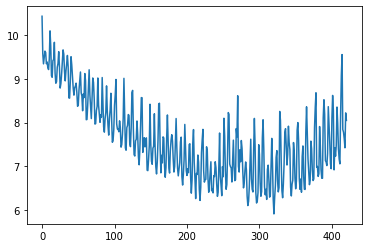

In [117]:
rmses = []

for i in range(421):    
    rmse = np.sqrt(np.mean((pco2_images[i]-predicted_image[i])**2))
    rmses.append(rmse)

plt.plot(rmses)
plt.savefig('../assets/val_overtime.png')

## MPI Dataset Result


In [123]:
# Reading Data
dir_name="../data/mpi_001"
cesm_dir_name="../data/data1"

sys.path.insert(0, '../src/preprocess')

from data_preprocess import preprocess_images

X, pco2_images = preprocess_images_mpi(dir_name,cesm_dir_name)

In [124]:

best_model = tf.keras.models.load_model('../models/base_model/reduceddim_model1.h5', custom_objects={'custom_rmse':custom_rmse})
predicted_image=best_model.predict(X,verbose=1)

14/14 [==============================] - 1s 70ms/step


### Model 1 Result

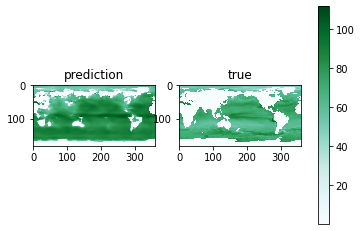

In [125]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots(1, 2)


img=axis[0].imshow(np.flipud(np.squeeze(predicted_image[200])), cmap="BuGn", interpolation="nearest")
axis[0].set_title("prediction")
plt.colorbar(img,ax=axis)

img1=axis[1].imshow(np.flipud(np.squeeze(pco2_images[200])), cmap="BuGn", interpolation="nearest")
axis[1].set_title("true")
plt.savefig('../assets/mpi_comparison.png', dpi=199)
plt.show()



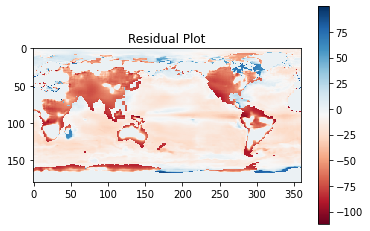

In [126]:
diff=np.flipud(np.squeeze(pco2_images[200]-predicted_image[200]))
plt.imshow(diff,cmap="RdBu", interpolation="nearest")
plt.colorbar()
plt.title("Residual Plot")

plt.savefig('../assets/mpi_residual.png', dpi=199)
plt.show()

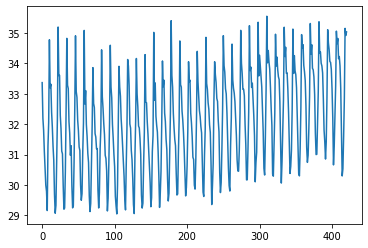

In [127]:
# Over time

rmses = []

for i in range(421):    
    rmse = np.sqrt(np.mean((pco2_images[i]-predicted_image[i])**2))
    rmses.append(rmse)

plt.plot(rmses)
plt.savefig('../assets/mpi_overtime.png')

In [75]:
print("RMSE score!")
np.sqrt(np.mean((predicted_image-pco2_images)**2))


RMSE score!


32.13185

## Canada Dataset

In [128]:
dir_name="../data/can_001"

In [129]:
X, pco2_images = preprocess_images_can(dir_name,cesm_dir_name)

In [130]:
best_model = tf.keras.models.load_model('../models/base_model/reduceddim_model1.h5', custom_objects={'custom_rmse':custom_rmse})
predicted_image=best_model.predict(X,verbose=1)

14/14 [==============================] - 1s 70ms/step


### Canada Model Result

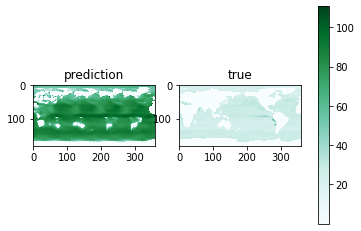

In [131]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots(1, 2)


img=axis[0].imshow(np.flipud(np.squeeze(predicted_image[200])), cmap="BuGn", interpolation="nearest")
axis[0].set_title("prediction")
plt.colorbar(img,ax=axis)

img1=axis[1].imshow(np.flipud(np.squeeze(pco2_images[200])), cmap="BuGn", interpolation="nearest")
axis[1].set_title("true")
plt.savefig('../assets/can_comparison.png', dpi=199)
plt.show()



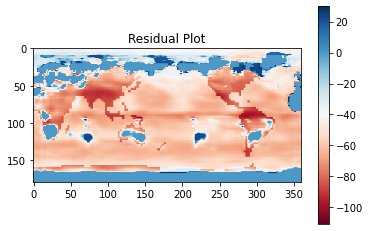

In [132]:
diff=np.flipud(np.squeeze(pco2_images[200]-predicted_image[200]))
plt.imshow(diff,cmap="RdBu", interpolation="nearest")
plt.colorbar()
plt.title("Residual Plot")

plt.savefig('../assets/can_residual.png', dpi=199)
plt.show()

In [100]:
print("RMSE score!")
np.sqrt(np.mean((predicted_image-pco2_images)**2))
# generalization works pretty well

RMSE score!


55.42691

In [101]:
rmses = []

for i in range(421):    
    rmse = np.sqrt(np.mean((pco2_images[i]-predicted_image[i])**2))
    rmses.append(rmse)

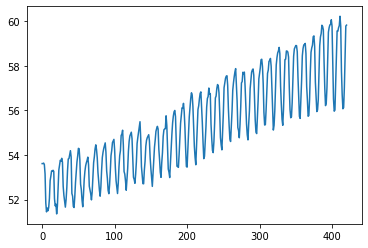

In [102]:
plt.plot(rmses)
plt.savefig('../assets/can_overtime.png', dpi=199)



In [111]:
import os
import xarray as xr
import pandas as pd
import sys
import numpy as np
sys.path.insert(0, '../src')

def read_xarray(dir_name="",mem_num="001"):
    '''
     read_xarray(dir)name) opens data and returns data in xarray format for each feature
    '''
    chl = xr.open_dataset(f'{dir_name}/Chl_2D_mon_CESM{mem_num}_1x1_198201-201701.nc')

    mld = xr.open_dataset(f'{dir_name}/MLD_2D_mon_CESM{mem_num}_1x1_198201-201701.nc')

    sss = xr.open_dataset(f'{dir_name}/SSS_2D_mon_CESM{mem_num}_1x1_198201-201701.nc')

    sst = xr.open_dataset(f'{dir_name}/SST_2D_mon_CESM{mem_num}_1x1_198201-201701.nc')

    u10 = xr.open_dataset(f'{dir_name}/U10_2D_mon_CESM{mem_num}_1x1_198201-201701.nc')

    fg_co2= xr.open_dataset(f'{dir_name}/FG-CO2_2D_mon_CESM{mem_num}_1x1_198201-201701.nc')

    xco2 = xr.open_dataset(f'{dir_name}/XCO2_1D_mon_CESM{mem_num}_native_198201-201701.nc')

    icefrac = xr.open_dataset(f'{dir_name}/iceFrac_2D_mon_CESM{mem_num}_1x1_198201-201701.nc')

    patm = xr.open_dataset(f'{dir_name}/pATM_2D_mon_CESM{mem_num}_1x1_198201-201701.nc')

    pco2 = xr.open_dataset(f'{dir_name}/pCO2_2D_mon_CESM{mem_num}_1x1_198201-201701.nc')

    return chl,mld,sss,sst,u10,fg_co2,xco2,icefrac,patm,pco2

def read_xarray_mpi(dir_name=""):
    '''
     read_xarray(dir)name) opens data and returns data in xarray format for each feature
    '''
    chl = xr.open_dataset(f'{dir_name}/Chl_2D_mon_MPI006_1x1_198201-201701.nc')

    mld = xr.open_dataset(f'{dir_name}/MLD_2D_mon_MPI006_1x1_198201-201701.nc')

    sss = xr.open_dataset(f'{dir_name}/SSS_2D_mon_MPI006_1x1_198201-201701.nc')

    sst = xr.open_dataset(f'{dir_name}/SST_2D_mon_MPI006_1x1_198201-201701.nc')

    u10 = xr.open_dataset(f'{dir_name}/U10_2D_mon_MPI006_1x1_198201-201701.nc')

    icefrac = xr.open_dataset(f'{dir_name}/iceFrac_2D_mon_MPI006_1x1_198201-201701.nc')

    patm = xr.open_dataset(f'{dir_name}/pATM_2D_mon_MPI006_1x1_198201-201701.nc')

    pco2 = xr.open_dataset(f'{dir_name}/pCO2_2D_mon_MPI006_1x1_198201-201701.nc')

    return chl,mld,sss,sst,u10,icefrac,patm,pco2


### Image Data Preprocess for CNN ###
def preprocess_images_mpi(dir_name,cesm_dir):
    chl,mld,sss,sst,u10,fg_co2,xco2,icefrac,patm,pco2=read_xarray(cesm_dir)
    chl,mld,sss,sst,u10,icefrac,patm,pco2 = read_xarray_mpi(dir_name)
    
    chl_images = preprocess_image_reduced(chl.Chl.data)
    mld_images = preprocess_image_reduced(mld.MLD.data)
    sss_images = preprocess_image_reduced(sss.SSS.data)
    sst_images = preprocess_image_reduced(sst.SST.data)
    xco2_images = preprocess_image_reduced(xco2.XCO2.data,xco2=True)
    
    pco2_images = preprocess_image_reduced(pco2.pCO2.data)
    
    X = np.stack((chl_images, mld_images, sss_images, sst_images, xco2_images), axis = 1)
    X = X.reshape((421,180,360,5))

    return X, pco2_images


#
def read_xarray_can(dir_name=""):
    '''
     read_xarray(dir)name) opens data and returns data in xarray format for each feature
    '''
    chl = xr.open_dataset(f'{dir_name}/Chl_2D_mon_CanESM2r1r10_1x1_198201-201712.nc')

    mld = xr.open_dataset(f'{dir_name}/MLD_2D_mon_CanESM2r1r10_1x1_198201-201712.nc')

    sss = xr.open_dataset(f'{dir_name}/SSS_2D_mon_CanESM2r1r10_1x1_198201-201712.nc')

    sst = xr.open_dataset(f'{dir_name}/SST_2D_mon_CanESM2r1r10_1x1_198201-201712.nc')

    u10 = xr.open_dataset(f'{dir_name}/U10_2D_mon_CanESM2r1r10_1x1_198201-201712.nc')

    icefrac = xr.open_dataset(f'{dir_name}/iceFrac_2D_mon_CanESM2r1r10_1x1_198201-201712.nc')

    patm = xr.open_dataset(f'{dir_name}/pATM_2D_mon_CanESM2r1r10_1x1_198201-201712.nc')

    pco2 = xr.open_dataset(f'{dir_name}/pCO2_2D_mon_CanESM2r1r10_1x1_198201-201712.nc')

    return chl,mld,sss,sst,u10,icefrac,patm,pco2


### Image Data Preprocess for CNN ###
def preprocess_images_can(dir_name,cesm_dir):
    chl,mld,sss,sst,u10,fg_co2,xco2,icefrac,patm,pco2=read_xarray(cesm_dir)
    chl,mld,sss,sst,u10,icefrac,patm,pco2 = read_xarray_can(dir_name)
    
    chl_images = preprocess_image_reduced(chl.Chl.data)
    mld_images = preprocess_image_reduced(mld.MLD.data)
    sss_images = preprocess_image_reduced(sss.SSS.data)
    sst_images = preprocess_image_reduced(sst.SST.data)
    xco2_images = preprocess_image_reduced(xco2.XCO2.data,xco2=True)
    
    pco2_images = preprocess_image_reduced(pco2.pCO2.data)
    
    X = np.stack((chl_images, mld_images, sss_images, sst_images, xco2_images), axis = 1)
    X = X.reshape((421,180,360,5))

    return X, pco2_images


def preprocess_images(dir_name,mem_num="001"):
    
    chl,mld,sss,sst,u10,fg_co2,xco2,icefrac,patm,pco2 = read_xarray(dir_name,mem_num)
    
    chl_images = preprocess_image_reduced(chl.Chl.data)
    mld_images = preprocess_image_reduced(mld.MLD.data)
    sss_images = preprocess_image_reduced(sss.SSS.data)
    sst_images = preprocess_image_reduced(sst.SST.data)
    xco2_images = preprocess_image_reduced(xco2.XCO2.data,xco2=True)
    
    pco2_images = preprocess_image_reduced(pco2.pCO2.data)
    
    X = np.stack((chl_images, mld_images, sss_images, sst_images, xco2_images), axis = 1)
    X = X.reshape((421,180,360,5))

    return X, pco2_images

def preprocess_image_reduced(data,xco2=False):
    if xco2:
        return xco2_preprocess(data)
    
    return scale_image(convert_nan(data))
  

### FOR SEQUENTIAL + VISION
def create_shifted_frames(data):
    x = data[:, 0 : data.shape[1] - 1, :, :]
    y = data[:, 1 : data.shape[1], :, :]
    return x, y

### FOR VISION ###

def xco2_preprocess(data):
    """
    ## XCO2 Handling
    # - xco2 values are a constant value across the globe, 
    # - creating an image layer with constant value for the model
    # - xco2 layer improves prediction

    """
    output=[]
    min_xco2=np.min(data)
    max_xco2=np.max(data)
    new_min=0
    new_max=255
    
    for i in data:
        num = (i-min_xco2)*(new_max-new_min)/(max_xco2-min_xco2)+new_min
        tmp = (np.repeat(num,180*360)).reshape(180,-1)
        output.append(tmp)
        
    output=np.array(output)

    return output


def convert_nan(arr):
    """
    convert_nan(arr)
    - converts nan values to the lowest value (continents)
    """
    nans=np.isnan(arr)
    min_val=arr[~nans].min()
    arr[nans]=min_val-1
    return arr

def add_dimension(arr):
    """
    add_dimension(arr)
    - add one dimension to axis=3
    """
    images=np.expand_dims(arr, axis=3)
    return images

def scale_image(arr):
    """
    scale_image(arr)
    - scales numerical values from scale 0-255 for like an image
    - have tried, regular normal/ min-max scaler -> does not work well
    """
    ## Normal
    #arr=(arr-np.mean(arr))/np.std(arr)
    
    ## Min-Max
    # min_val=arr.min()
    # max_val=arr.max()
    # arr=arr/(min_val-max_val)

    ## Image Scale
    min_pixel = arr.min() 
    max_pixel = arr.max()
    new_min = 0
    new_max = 255
    arr = (arr-min_pixel)*(255)/(max_pixel-min_pixel)+new_min 
    return arr
  


